In [25]:
import itertools
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as skmetrics

from lab import metrics

In [35]:
def load_data(config_path: str = "../config/config.yaml"):
    with open(config_path, mode="r") as configfile:
        config = yaml.safe_load(configfile)
        
    keys = list(itertools.product(("p1fp",), ("quic",), range(config["n_repetitions"])))
    
    return pd.concat([
        pd.read_csv(f"../results/dataset-performance/{classifier}/predictions-{factor}-{rep:02d}.csv")
        for classifier, factor, rep in keys
    ], keys=keys, names=["classifier", "factor", "repetition"])

dataset = load_data()
display(dataset)

y_true        -1             0  \
classifier factor repetition                                         
p1fp       quic   0          0        -1.0  0.964790  1.677791e-06   
                             1        -1.0  0.510311  1.613587e-05   
                             2        -1.0  0.783630  4.256966e-05   
                             3        -1.0  0.797291  9.173095e-07   
                             4        -1.0  0.886401  1.495633e-04   
...                                    ...       ...           ...   
                             27354    -1.0  0.590853  2.549799e-05   
                             27355    23.0  0.728294  3.082411e-04   
                             27356    -1.0  0.962810  3.656163e-05   
                             27357    -1.0  0.768669  9.297894e-07   
                             27358    13.0  0.828831  5.251730e-06   

                                               1         2             3  \
classifier factor repetition                                               
p1fp       quic   0          0      1.628216e-06  0.000002  1.192231e-06   
                             1      2.173032e-05  0.000017  1.479702e-05   
                             2      2.374704e-05  0.011618  1.289100e-05   
                             3      1.205905e-06  0.000575  6.856200e-07   
                             4      4.103741e-03  0.000016  2.203140e-04   
...                                          ...       ...           ...   
                             27354  1.485891e-05  0.000026  9.620359e-06   
                             27355  7.819068e-03  0.000005  4.671778e-04   
                             27356  2.126110e-05  0.000021  1.534750e-05   
                             27357  8.442464e-07  0.000030  2.857805e-07   
                             27358  1.373166e-05  0.006763  7.385368e-06   

                                           4         5         6  \
classifier factor repetition                                       
p1fp       quic   0          0      0.000005  0.000014  0.000002   
                             1      0.000024  0.000003  0.000023   
                             2      0.000173  0.000003  0.000036   
                             3      0.000002  0.000004  0.000066   
                             4      0.004783  0.001507  0.000030   
...                                      ...       ...       ...   
                             27354  0.000042  0.000002  0.000020   
                             27355  0.016129  0.013302  0.000018   
                             27356  0.000087  0.000007  0.000018   
                             27357  0.000014  0.000012  0.000009   
                             27358  0.000021  0.000043  0.000069   

                                               7  ...        90            91  \
classifier factor repetition                      ...                           
p1fp       quic   0          0      5.071954e-04  ...  0.000037  7.347749e-07   
                             1      3.136661e-06  ...  0.000002  6.188917e-05   
                             2      2.240657e-05  ...  0.000021  3.727056e-02   
                             3      3.122985e-04  ...  0.018138  6.325055e-03   
                             4      1.733065e-06  ...  0.000004  1.985193e-05   
...                                          ...  ...       ...           ...   
                             27354  3.415770e-06  ...  0.000003  2.795604e-04   
                             27355  4.472113e-07  ...  0.000003  1.586966e-06   
                             27356  3.201655e-06  ...  0.000004  1.572645e-04   
                             27357  4.547537e-05  ...  0.005856  3.498780e-04   
                             27358  2.145814e-04  ...  0.000611  9.333623e-04   

                                          92        93        94  \
classifier factor repetition                                       
p1fp       quic   0          0      0.006422  0.000005  0.000

In [36]:
#dataset_varcnn = pd.concat([
#    dataset,
#    ((dataset.loc[["varcnn-time"]] + dataset.loc[["varcnn-sizes"]].values) / 2).rename({"varcnn-time": "varcnn"})
#]).drop(["varcnn-time", "varcnn-sizes"])

#display(dataset_varcnn)


In [37]:
def score(frame):
    y_true = frame["y_true"]
    
    classes = np.arange(-1, 100)
    predictions = frame.loc[:, [str(x) for x in range(-1, 100)]].values
    y_pred = classes[np.argmax(predictions, axis=1)]
    
    return pd.Series({
        "precision": metrics.rprecision_score(y_true, y_pred, ratio=20),
        "recall": metrics.recall_score(y_true, y_pred),
        "accuracy": skmetrics.accuracy_score(y_true, y_pred)
    })

#scores = dataset_varcnn.groupby(["classifier", "factor", "repetition"]).apply(score)
#display(scores)

,classifier,factor,repetition,metric,score
0,p1fp,quic,0,precision,0.626855
1,p1fp,quic,0,recall,0.071251
2,p1fp,quic,0,accuracy,0.834935


Text(0.5499999999999972, 0.5, 'Accuracy Score')

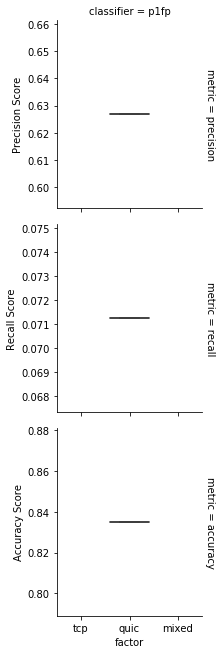

In [38]:
scores = dataset.groupby(["classifier", "factor", "repetition"]).apply(score)
plot_data = scores.rename_axis("metric", axis=1).stack().rename("score").reset_index()
display(plot_data)
plot_data.to_csv("../results/dataset-performance/plot-data.csv", index=False, header=True)


grid = sns.catplot(x="factor", y="score", row="metric", col="classifier", data=plot_data,
                   kind="box", sharey=False, height=3, margin_titles=True,
                   order=["tcp", "quic", "mixed"], showfliers=False)
                  
grid.axes[0][0].set_ylabel("Precision Score")
grid.axes[1][0].set_ylabel("Recall Score")
grid.axes[2][0].set_ylabel("Accuracy Score")


# grid.savefig("../results/plots/dataset-comparison.pdf", bbox_inches="tight", dpi=150)